In [159]:
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import os
import time
# local modules


face_cascade = cv2.CascadeClassifier('../haar-cascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../haar-cascades/haarcascade_eye.xml')

img = cv2.imread('../../images/faces/man1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

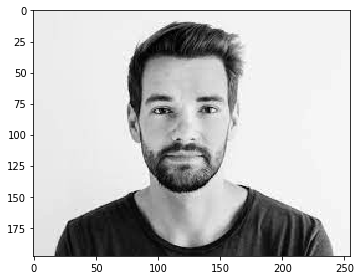

In [22]:
io.imshow(gray)

28 28 201 201


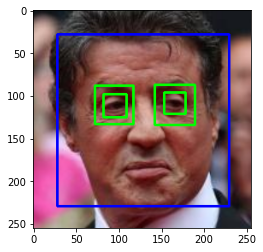

24 28 204 204


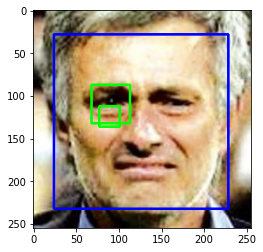

31 32 197 197


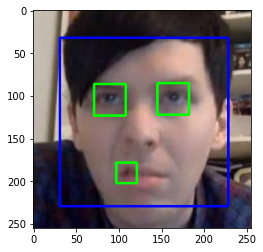

33 31 189 189


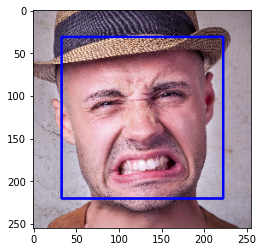

32 33 190 190


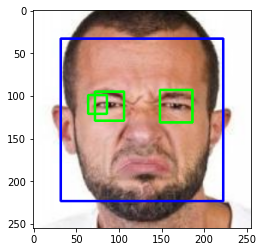

29 28 200 200


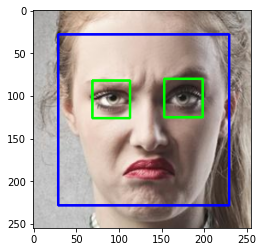

In [162]:
happy_faces = list(os.walk('../../images/Disgust'))
happy_dir = happy_faces[0][0]
happy_images = happy_faces[0][2]
for file_path in happy_images:
    img = cv2.imread(os.path.join(happy_dir, file_path))
    img = cv2.resize(img, (255, 255))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.05, minNeighbors=4, minSize=(150, 150), flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        print(x,y,w,h)
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.05, minNeighbors=1, minSize=(10,10), maxSize=(50, 50), flags=cv2.CASCADE_SCALE_IMAGE)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    # print(faces)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    # sleep for 2 seconds
    time.sleep(1)